<a href="https://colab.research.google.com/github/sudheendrakatikar/cmpe255-project-team1/blob/main/maincode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 255 Group Project

###Includes

In [17]:
# Includes
from google.colab import files
from google.colab import drive

import pandas as pd
import numpy as np
import folium
from folium import features
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt 
import seaborn as sns
from dateutil.parser import parse
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



# Use line below to unmount
# drive.flush_and_unmount()

# Use line below to mount drive to access data
# drive.mount('/content/drive')

### Mount Drive

In [7]:
#The dataset is stored within google drive. This notebook was made in google colab.
#The following command is used mount our drive to give access to the data.

#Enable authorization of your drive by entering the code given to you by Google.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Defining Load Data Function

In [5]:
#Data Preprocessing Functions
def load_data(filename):
    # Create Pandas Dataframe from CSV File. 
    # Input filename as a String

    return pd.read_csv(filename, encoding='utf-8')

### Define Cleanup Data Functions

In [69]:
#Clean Up Functions

#The following functions are templates for cleaning up data. The actual functions are used
#on a per method basis.
def remove_unnecersary_columns(df):
    df.drop([], axis=1, inplace=True)
    return

def  fill_missing_values(df):
    #df.fillna(value="No Name", inplace=True)

    #Display For Debugging
    #display(df)
    return
def drop_col(df):
    #df.drop(['LATITUDE', 'LONGITUDE'], axis=1, inplace=True)
    #display(df)
    return

def drop_row(df):
    df.dropna(subset=['LATITUDE', 'LONGITUDE', 'ON STREET NAME'], inplace = True)    
    return

### Method Functions

In [ ]:
#Load the dataframe into a dataframe before performing a method
data = load_data('/content/drive/Shareddrives/CMPE_255/255_Project/motor_vehicle_collisions_crashes.csv')

#### Method 1: Association Analysis

#### Please Refer to github under assoc-rule-mining.ipynb
Note: For association analysis, we had an error bringing our code in from a jupyter notebook. Google colab throws an error. Please refer to the file in github and run in jupyter notebook.

In [97]:
# #Looking For association with num of peds injured and street location
# df = data.loc[data['NUMBER OF PEDESTRIANS INJURED'] > 0, ['BOROUGH', 'ON STREET NAME', 'CONTRIBUTING FACTOR VEHICLE 1']]
# te = TransactionEncoder()
# te_ary = te.fit(df.values).transform(df.values)
# df = pd.DataFrame(te_ary, columns=te.columns_)
# df

In [81]:
# frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
# rules.sort_values(['lift'], ascending=False)

In [82]:
# association_analysis(data)

#### Method 2: Clustering

In [18]:
#Load the dataframe into a dataframe before performing a method
data = load_data('/content/drive/Shareddrives/CMPE_255/255_Project/motor_vehicle_collisions_crashes.csv')

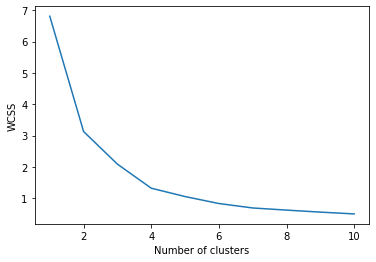

In [21]:
temp = data.loc[data['NUMBER OF PEDESTRIANS KILLED'] > 0, ['LATITUDE', 'LONGITUDE']].dropna()
drop_lat = temp[np.abs(temp['LATITUDE']-temp['LATITUDE'].mean()) <= (temp['LATITUDE'].std())]
drop_long = drop_lat[np.abs(drop_lat['LONGITUDE']-drop_lat['LONGITUDE'].mean()) <= (drop_lat['LONGITUDE'].std())]
X = drop_long.values
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X)

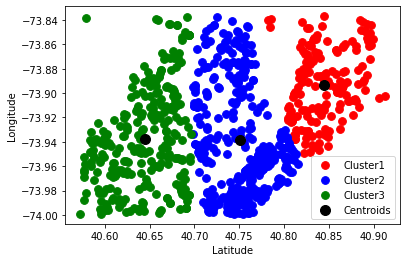

In [23]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend() 
plt.show()

#### Method 3: Classification


In [83]:
#Reload Data
data = load_data('/content/drive/Shareddrives/CMPE_255/255_Project/motor_vehicle_collisions_crashes.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [89]:
data['CRASH HOUR'] = pd.Series(datetime.strptime(time, '%H:%M').hour for time in data['CRASH TIME'])
columns = ['CRASH HOUR', 'BOROUGH', 'CONTRIBUTING FACTOR VEHICLE 1']
df = data[columns]

for col in columns:
    df = df[df[col].notna()]

df = df.loc[df['CONTRIBUTING FACTOR VEHICLE 1'] != 'UNSPECIFIED']

features = df.columns.tolist()
clas = 'CONTRIBUTING FACTOR VEHICLE 1'
features.remove(clas)

classes = df[clas].value_counts().index[:10].tolist()
df = df.loc[df[clas].isin(classes)]

encoder = LabelEncoder()
for feature in features:
    encoder.fit(df[feature])
    df[feature] = encoder.transform(df[feature])

target_encoded = encoder.fit_transform(df[clas])
df[clas] = target_encoded
df[clas].value_counts()

9    493061
1    232790
2     78072
0     54167
5     41467
4     40700
6     30577
8     30054
7     28824
3     25495
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64

In [90]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(features))]
vif['Features'] = features
vif

,VIF,Features
0,3.538927,CRASH HOUR
1,2.648008,BOROUGH


In [91]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(clas, axis=1), df[clas], test_size=0.1, random_state=143)
cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
y_prob_pred_cnb = cnb.predict_proba(X_test)

# How did our classifier model perform?

count_misclassified = (y_test != y_pred_cnb).sum()

print("CategoricalNB")
print("=" * 30)
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = accuracy_score(y_test, y_pred_cnb)
print('Accuracy: {:.2f}'.format(accuracy))

CategoricalNB
Misclassified samples: 56162
Accuracy: 0.47


In [92]:
print("Recall score : ", recall_score(y_test, y_pred_cnb , average='micro'))
print("Precision score : ",precision_score(y_test, y_pred_cnb , average='micro'))
print("F1 score : ",f1_score(y_test, y_pred_cnb , average='micro'))

Recall score :  0.4677647103420172
Precision score :  0.4677647103420172
F1 score :  0.4677647103420172


In [93]:
print(classification_report(y_test, y_pred_cnb))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5569
           1       0.00      0.00      0.00     23023
           2       0.00      0.00      0.00      7953
           3       0.00      0.00      0.00      2491
           4       0.00      0.00      0.00      4055
           5       0.00      0.00      0.00      4082
           6       0.00      0.00      0.00      3027
           7       0.00      0.00      0.00      2900
           8       0.00      0.00      0.00      3062
           9       0.47      1.00      0.64     49359

    accuracy                           0.47    105521
   macro avg       0.05      0.10      0.06    105521
weighted avg       0.22      0.47      0.30    105521



### Data Visualizations

In [ ]:
#This section contains code for data visualizations
#Load the dataframe into a dataframe to ensure the data is unmodified from previous sections
data = load_data('/content/drive/Shareddrives/CMPE_255/255_Project/motor_vehicle_collisions_crashes.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [16]:
#Please note: More visualizations are available in Github seperate files. 
#These are a few samples visualizations that we have decided to add that may be of interest


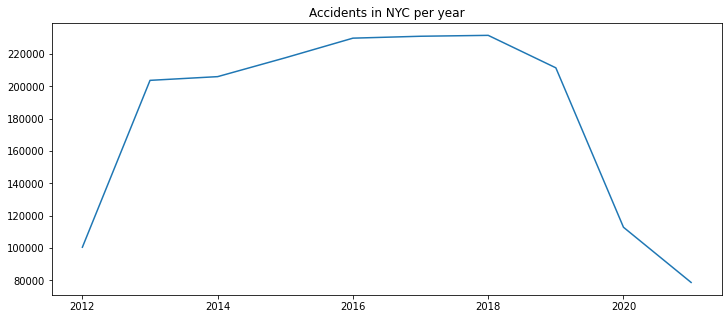

In [ ]:
# Graph for accidents per year

yearly = pd.Series([ datetime.strptime(date, '%m/%d/%Y').year for date in data['CRASH DATE'] ]).value_counts().sort_index()
yearly_plot = yearly.plot(kind='line', title='Accidents in NYC per year', figsize=(12, 5))
yearly_plot.figure.savefig('/content/drive/Shareddrives/CMPE_255/255_Project/img/Accidents_in_NYC_per_year.png', facecolor='white')

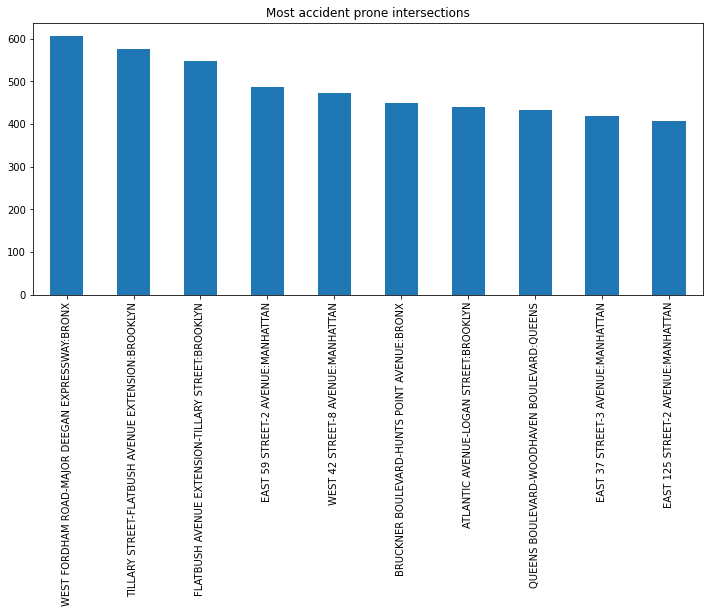

In [ ]:
# Bar graph for top 10 accident prone intersections

intersections = data['ON STREET NAME'].str.strip() + '-' + data['CROSS STREET NAME'].str.strip() + ':'+data['BOROUGH'].str.strip()
intersections = intersections.dropna().value_counts().sort_values(ascending=False)[:10]
intersections_plot = intersections.plot(kind='bar', title='Most accident prone intersections', figsize=(12, 5))
intersections_plot.figure.savefig('/content/drive/Shareddrives/CMPE_255/255_Project/img/Accident_prone_Intersections.png', facecolor='white')

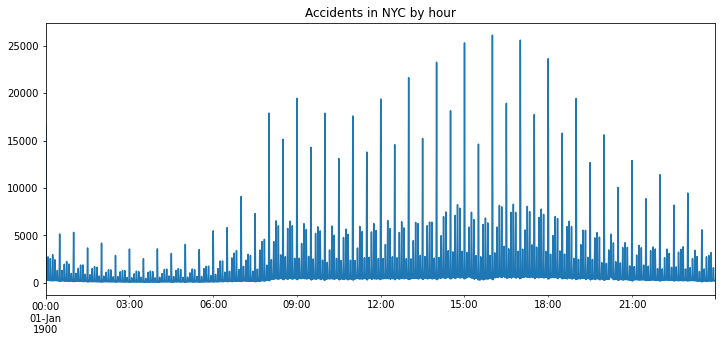

In [ ]:
# Bar graph for accidents per hour

time_series = pd.Series([ datetime.strptime(time, '%H:%M') for time in data['CRASH TIME'] ]).value_counts().sort_index()
hourly_plot = time_series.plot(kind='line', title='Accidents in NYC by hour', figsize=(12, 5))
hourly_plot.figure.savefig('/content/drive/Shareddrives/CMPE_255/255_Project/img/Accidents_in_NYC_per_hour.png', facecolor='white')

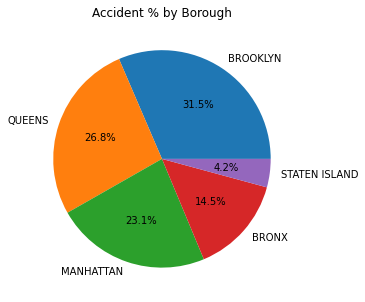

In [ ]:
# Pie chart for accidents per borough

accidents_borough = data['BOROUGH'].value_counts()
pie = accidents_borough.plot.pie(title='Accident % by Borough', label='', autopct='%1.1f%%', figsize=(12, 5))
pie.figure.savefig('/content/drive/Shareddrives/CMPE_255/255_Project/img/Accident % by Borough.png', facecolor='white')

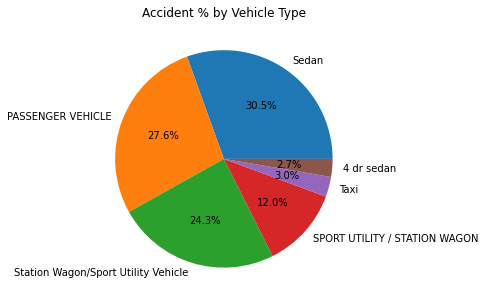

In [ ]:
# Pie chart for accident contribution of different vehicle types

accidents_vehicle_type = data['VEHICLE TYPE CODE 1'].value_counts()
filtered = accidents_vehicle_type[accidents_vehicle_type >= 0.02*accidents_vehicle_type.sum()]
pie = filtered.plot.pie(title='Accident % by Vehicle Type', label='', autopct='%1.1f%%', figsize=(12, 5))
pie.figure.savefig('/content/drive/Shareddrives/CMPE_255/255_Project/img/Accident % by Vehicle Type.png', facecolor='white')

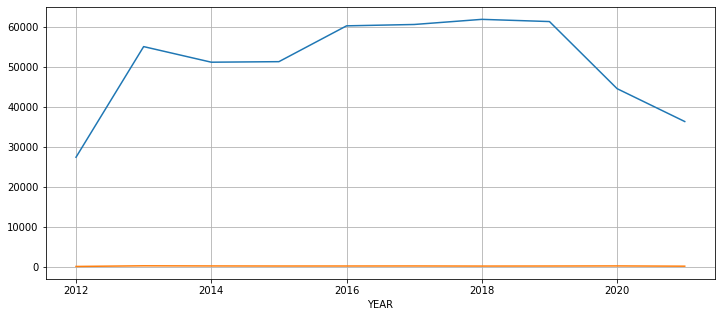

In [ ]:
injuries_deaths = data[
    ['CRASH DATE',
     'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
     'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED',
     'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
     'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
]
injuries_deaths['YEAR'] = pd.Series(datetime.strptime(date, '%m/%d/%Y').year for date in injuries_deaths['CRASH DATE'])
injuries = injuries_deaths.groupby(['YEAR'])['NUMBER OF PERSONS INJURED'].sum().plot(kind='line', figsize=(12, 5), grid=True)
injuries.figure.savefig('/content/drive/Shareddrives/CMPE_255/255_Project/img/Injuries_per_Year.png', facecolor='white')
deaths = injuries_deaths.groupby(['YEAR'])['NUMBER OF PERSONS KILLED'].sum().plot(kind='line', figsize=(12, 5), grid=True)
deaths.figure.savefig('/content/drive/Shareddrives/CMPE_255/255_Project/img/Deaths_per_Year.png', facecolor='white')